In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [79]:
stock = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Train/VNI.csv', parse_dates=['Date'], index_col=0)
VNItest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/STOCK_Prediction/Datasets/Test/VNI.csv',
                        parse_dates=['Date'], index_col='Date')
stock.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-12-31,"1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
2021-12-30,"1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2021-12-29,"1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
2021-12-28,"1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
2021-12-27,"1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%


In [80]:
stock.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [81]:
stock["Price"] = pd.to_numeric(stock["Price"].apply(lambda x: x.replace(",", "")))
stock = stock.iloc[::-1]

VNItest["Price"] = pd.to_numeric(VNItest["Price"].apply(lambda x: x.replace(",", "")))
VNItest = VNItest.iloc[::-1]

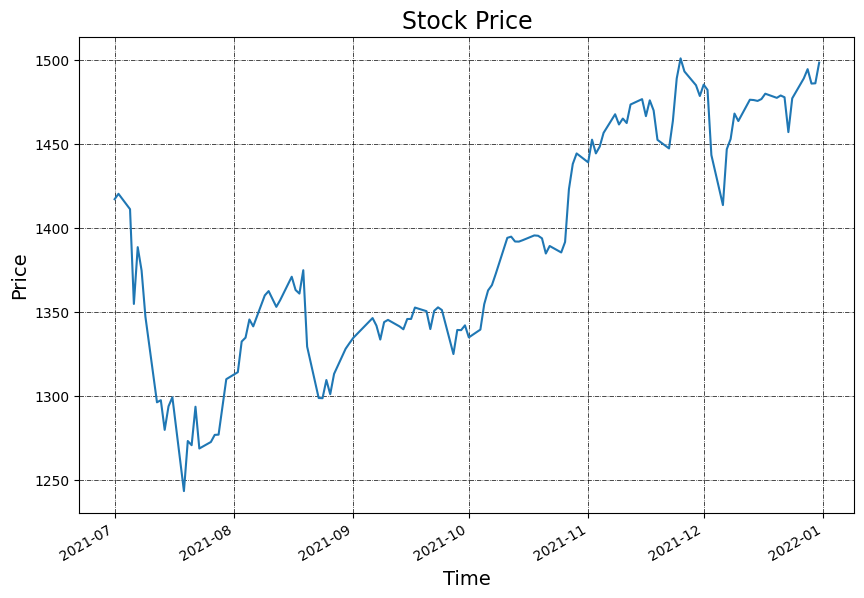

In [82]:
stock['Price'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

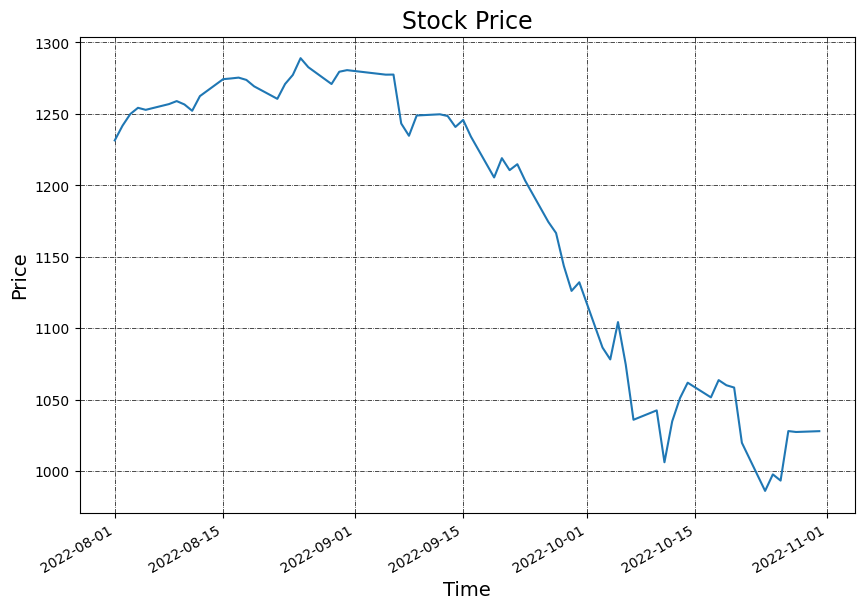

In [83]:
VNItest['Price'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [84]:
df = pd.DataFrame(stock, columns=['Price'])
df = df.reset_index()
df.head()

,Date,Price
0,2021-07-01,1417.08
1,2021-07-02,1420.27
2,2021-07-05,1411.13
3,2021-07-06,1354.79
4,2021-07-07,1388.55


In [85]:
test = pd.DataFrame(VNItest, columns=['Price'])
test = test.reset_index()
test.head()

,Date,Price
0,2022-08-01,1231.35
1,2022-08-02,1241.62
2,2022-08-03,1249.76
3,2022-08-04,1254.15
4,2022-08-05,1252.74


In [86]:
# Import package for linear model
from sklearn.linear_model import LinearRegression
# Reshape index column to 2D array for .fit() method
X_train = np.array(df.index).reshape(-1, 1)
y_train = df['Price']
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [87]:
model.score(X_train, y_train)

0.7340947466559128

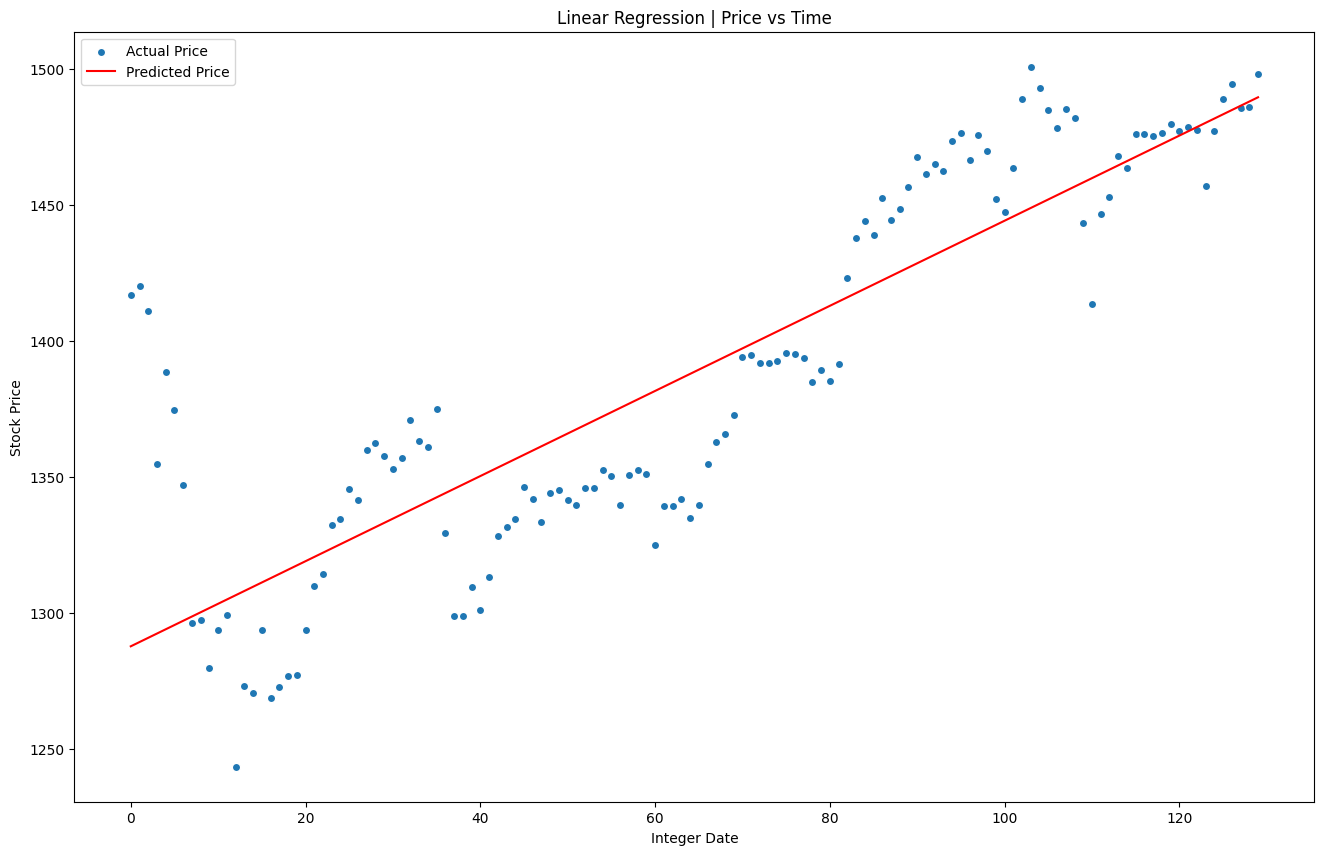

In [88]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [89]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Price']
# Generate array with predicted values
y_pred = model.predict(X_test)

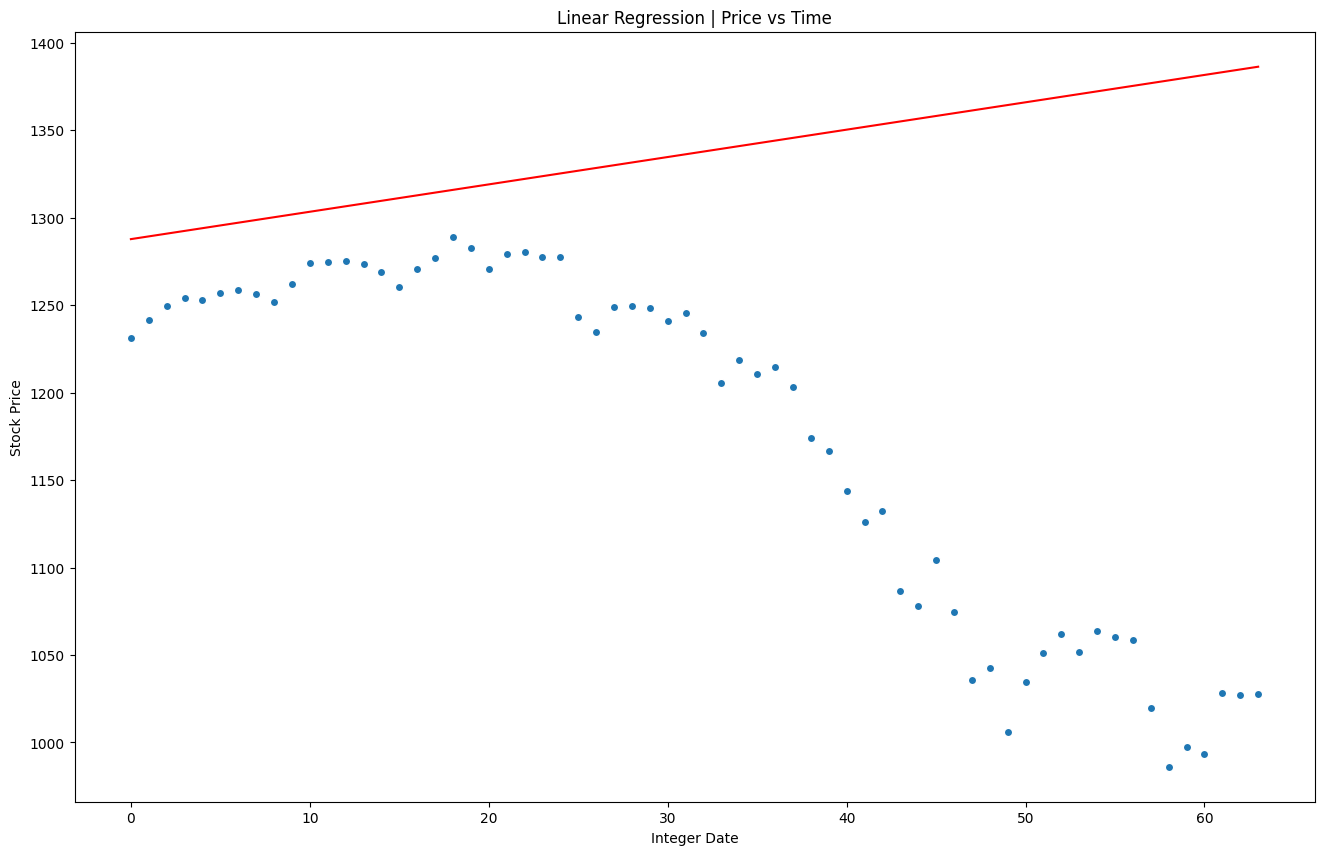

In [90]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.show()

In [91]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
df

,Date,Price,Prediction
0,2021-07-01,1417.08,1287.769841
1,2021-07-02,1420.27,1289.334241
2,2021-07-05,1411.13,1290.898641
3,2021-07-06,1354.79,1292.463040
4,2021-07-07,1388.55,1294.027440
...,...,...,...
125,2021-12-27,1488.88,1483.319791
126,2021-12-28,1494.39,1484.884191
127,2021-12-29,1485.82,1486.448590
128,2021-12-30,1485.97,1488.012990


In [92]:
test['Prediction'] = model.predict(np.array(test.index).reshape(-1, 1))
test

,Date,Price,Prediction
0,2022-08-01,1231.35,1287.769841
1,2022-08-02,1241.62,1289.334241
2,2022-08-03,1249.76,1290.898641
3,2022-08-04,1254.15,1292.463040
4,2022-08-05,1252.74,1294.027440
...,...,...,...
59,2022-10-25,997.70,1380.069418
60,2022-10-26,993.36,1381.633817
61,2022-10-27,1028.01,1383.198217
62,2022-10-28,1027.36,1384.762616


In [93]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics
# Statistical summary of test data
df['Price'].describe()

count     130.000000
mean     1388.673615
std        68.784144
min      1243.510000
25%      1339.580000
50%      1374.765000
75%      1460.365000
max      1500.810000
Name: Price, dtype: float64

In [94]:
# Calculate and print values of MAE, MSE, RMSE, R2
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 160.8181162235932
Mean Squared Error: 42078.42857278175
Root Mean Squared Error: 205.13027219984315
R2:  -3.1445616526942253
